In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from datasist.structdata import detect_outliers
import joblib
sns.set()

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
(df['price'] < 100000).sum()

58

In [6]:
df = df[df['price'] > 100000]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.538000e+03,4538.000000,4538.000000,4538.000000,4.538000e+03,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000,4538.000000
mean,5.592641e+05,3.397532,2.157779,2135.534597,1.483657e+04,1.513442,0.006611,0.235346,3.450198,1824.552887,310.981710,1970.868004,808.245483
std,5.641637e+05,0.903164,0.775372,955.047066,3.600074e+04,0.538609,0.081047,0.766365,0.673705,854.069025,462.372636,29.748486,979.362679
min,1.025000e+05,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.280000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.588970e+05,4.000000,2.500000,2610.000000,1.096800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
df.corr()['price'].sort_values()

yr_renovated    -0.028881
yr_built         0.019768
condition        0.037920
sqft_lot         0.051397
waterfront       0.150040
floors           0.151159
bedrooms         0.208360
sqft_basement    0.216615
view             0.242127
bathrooms        0.339397
sqft_above       0.379462
sqft_living      0.444212
price            1.000000
Name: price, dtype: float64

In [9]:
numerical = df.select_dtypes(exclude='object').columns
numerical

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [10]:
outliers = detect_outliers(df, 0, ['price'])
df.drop(outliers, inplace=True)


In [11]:
df.corr()['price'].sort_values()

yr_renovated    -0.070779
condition        0.045384
yr_built         0.058074
waterfront       0.072434
sqft_lot         0.099177
view             0.224937
sqft_basement    0.227193
floors           0.274009
bedrooms         0.305417
bathrooms        0.473613
sqft_above       0.541972
sqft_living      0.629991
price            1.000000
Name: price, dtype: float64

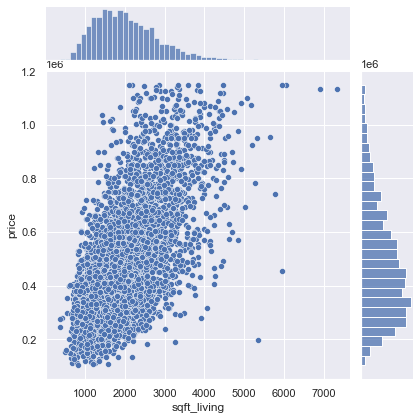

In [12]:
sns.jointplot(x='sqft_living', y='price', data=df)

In [13]:
outliers = df[(df['sqft_living'] > 2900) & (df['price'] < 0.4*1e6)].index
df.drop(outliers, inplace=True)
outliers = df[(df['sqft_living'] < 2000) & (df['price'] > 0.8*1e6)].index
df.drop(outliers, inplace=True)


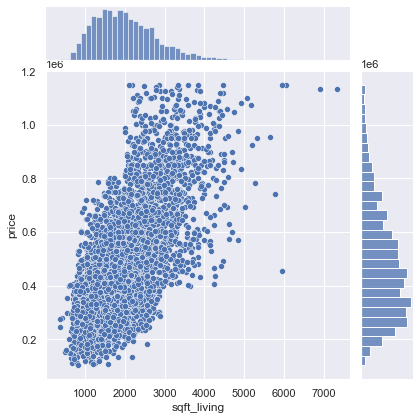

In [14]:
sns.jointplot(x='sqft_living', y='price', data=df)


In [15]:
categorical = df.select_dtypes(include='object')
for col in categorical:
    print(col)
    print(df[col].nunique())
    print('------------')

date
70
------------
street
4169
------------
city
42
------------
statezip
76
------------
country
1
------------


In [16]:
df = df.drop(['street', 'date', 'country'], axis=1)


In [17]:
df = pd.get_dummies(df, columns=['statezip', 'city'], drop_first=True)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,1,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,...,0,0,1,0,0,0,0,0,0,0


In [19]:
x = df.drop('price', axis=1)
y = df['price']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100)

In [21]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
models = {
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}

In [23]:

for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}')
    print('-----------------------------------------------------------')

Using model: LinearRegression
RMSE: 95602.54885577766
R2 Score: 0.8119929015801723
-----------------------------------------------------------
Using model: KNeighborsRegressor
RMSE: 112927.11491586307
R2 Score: 0.737679778571104
-----------------------------------------------------------
Using model: SVR
RMSE: 223911.2725340094
R2 Score: -0.031305231646337583
-----------------------------------------------------------
Using model: DecisionTreeRegressor
RMSE: 139834.78029960385
R2 Score: 0.597778099798824
-----------------------------------------------------------
Using model: RandomForestRegressor
RMSE: 106159.73606289127
R2 Score: 0.7681778310670593
-----------------------------------------------------------
Using model: XGBRegressor
RMSE: 96000.16843103517
R2 Score: 0.8104257726590327
-----------------------------------------------------------


In [24]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([ 700979.86773744,  312451.86773744,  244083.86773744,
        538185.86773744,  491081.86773744,  343907.86773744,
        377731.86773744,  705353.86773744,  175891.86773744,
        708179.86773744,  574281.86773744,  604563.86773744,
        198835.86773744,  420937.86773744,  201475.86773744,
        438579.86773744,  619081.86773744,  428339.86773744,
        489545.86773744,  555721.86773744,  474611.86773744,
        275401.86773744,  278281.86773744,  423379.86773744,
        628937.86773744,  388809.86773744,  290547.86773744,
        434249.86773744,  434307.86773744,  633011.86773744,
        660755.86773744,  601033.86773744,  447059.86773744,
        627251.86773744,  466505.86773744,  256531.86773744,
       1064009.86773744,  373833.86773744,  705609.86773744,
        487411.86773744,  584777.86773744,  465865.86773744,
        554569.86773744,  334921.86773744,  906569.86773744,
        375881.86773744,  374345.86773744,  520995.86773744,
        449267.86773744,

In [25]:
y_test

29      790000.0
3825    250000.0
2901    319950.0
2567    545000.0
824     522500.0
          ...   
2868    899000.0
829     551000.0
2961    458000.0
1776    390000.0
1568    329932.0
Name: price, Length: 848, dtype: float64

In [26]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

RMSE: 95602.54885577766
R2 Score: 0.8119929015801723


In [27]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']